In [1]:
!pip install mat73
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mat73
%matplotlib inline

In [3]:
data = mat73.loadmat("../data/mnist.mat")
X = data['digits_train'].astype(np.float32)
y = data['labels_train']

In [4]:
X = X.reshape(28*28,60000)

In [5]:
def classifier(digit):
    arr = []
    count=0
    for i in range(60000):
        if y[i] == digit:
            arr.append(np.array(X[:,i]))
            count +=1
    arr = np.array(arr)
    arr = arr.transpose()
    return arr

In [6]:
digits = []
for i in range(10):
    digits.append(classifier(i))

In [7]:
means = []
covars = []
digits_centralized = []
for digit in digits:
    mean = digit.mean(axis=1)
    means.append(mean)
    digit_centralized = digit.copy()
    for i in range(digit.shape[0]):
        digit_centralized[i,:] = digit_centralized[i,:] - mean[i]
    digits_centralized.append(digit_centralized)

for i in range(len(digits_centralized)):
    cov_matrix = np.matmul(digits_centralized[i], digits_centralized[i].transpose())/digits_centralized[i].shape[1]
    covars.append(cov_matrix)

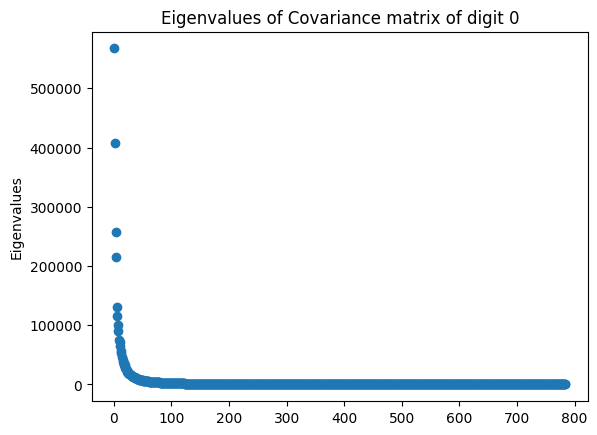

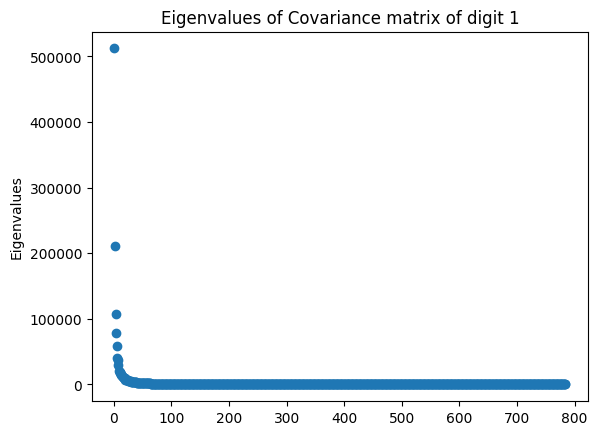

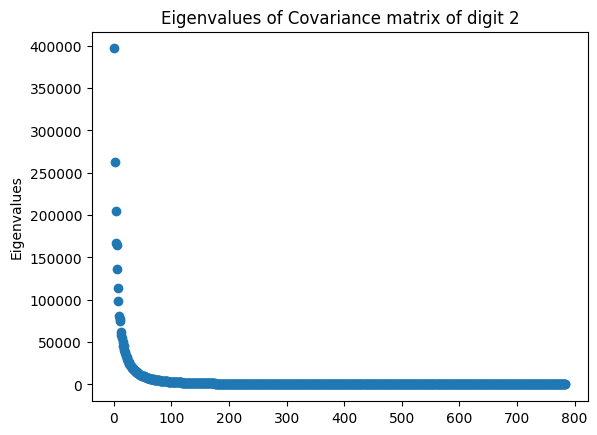

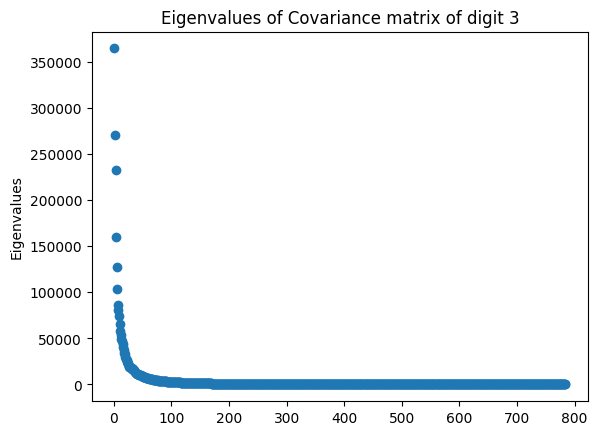

In [ ]:
principal_eVals = []
principal_eVectors = []
for i in range(len(covars)):
    eVals, eVectors = np.linalg.eigh(covars[i])
    principal_eVal = eVals[-1]
    principal_eVector = eVectors[:,-1]
    
    principal_eVals.append(principal_eVal)
    principal_eVectors.append(principal_eVector)
    
    eVals = np.flip(eVals)
    plt.scatter(y=eVals,x=range(1,eVals.shape[0]+1))
    plt.title(f"Eigenvalues of Covariance matrix of digit {i}")
    plt.ylabel("Eigenvalues")
    plt.show()

In [ ]:
for i in range(len(digits_centralized)):
    plt.subplot(1,3,1)
    plt.title("Negative Deviation from Mean")
    plt.imshow((means[i] - np.sqrt(principal_eVals[i])*principal_eVectors[i]).reshape(28,28))
    
    plt.subplot(1,3,2)
    plt.title("Mean")
    plt.imshow((means[i]).reshape(28,28))
    
    plt.subplot(1,3,3)
    plt.title("Positive Deviation from Mean")
    plt.imshow((means[i] + np.sqrt(principal_eVals[i])*principal_eVectors[i]).reshape(28,28))
    
    plt.tight_layout()
    plt.show()